# SEPSIS PREDICTION USING FASTAPI


## Business Understanding

Sepsis is a life-threatening condition caused by the body's response to an infection, which can lead to tissue damage, organ failure, and death if not treated promptly. Early detection and intervention are critical for improving patient outcomes and reducing mortality rates associated with sepsis. In this context, healthcare organizations are constantly seeking ways to improve their sepsis detection and management protocols.

# Hypothesis

# Analytical Questions

1. What are the most common risk factors or clinical indicators present in patients who develop sepsis?

2. Is there a correlation between the timing of antibiotic administration and patient outcomes in sepsis cases?

3. Can we identify specific biomarkers or laboratory values that serve as early indicators of sepsis development?

4. Are there demographic or comorbidity-related factors that predispose certain populations to a higher risk of sepsis?

5. How do different treatment protocols, such as fluid resuscitation strategies or vasopressor use, impact the progression and outcomes of sepsis patients?

# Data Understanding

Importation

In [40]:
# Data manipulation packages
import pandas as pd
import numpy as np
from dotenv import dotenv_values


#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import pearsonr,stats as stats
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.decomposition import PCA


# Database connection package
import pyodbc

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")



# Data Loading

In [23]:
df_train = pd.read_csv("D:\Azubi lp5\Building-a-FastAPI-for-Sepsis-Prediction-\Paitients_Files_Train.csv")
df_train.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive


In [24]:
df_test = pd.read_csv("D:\Azubi lp5\Building-a-FastAPI-for-Sepsis-Prediction-\Paitients_Files_Test.csv")
df_test.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


# Data Fields
1. ID	N/A	Unique number to represent patient ID

2. PRG	Attribute1	Plasma glucose

3. PL	Attribute 2	Blood Work Result-1 (mu U/ml)

4. PR	Attribute 3	Blood Pressure (mm Hg)

5. SK	Attribute 4	Blood Work Result-2 (mm)

6. TS	Attribute 5	Blood Work Result-3 (mu U/ml)

7. M11	Attribute 6	Body mass index (weight in kg/(height in m)^2

8. BD2	Attribute 7	Blood Work Result-4 (mu U/ml)

9. Age	Attribute 8	patients age (years)

10. Insurance	N/A	If a patient holds a valid insurance card

11. Sepssis	Target	Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

# EDA

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [26]:
df_train.duplicated().sum()

0

In [27]:
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
df_train.shape

(599, 11)

In [30]:
df_test.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


## Univariate Analysis

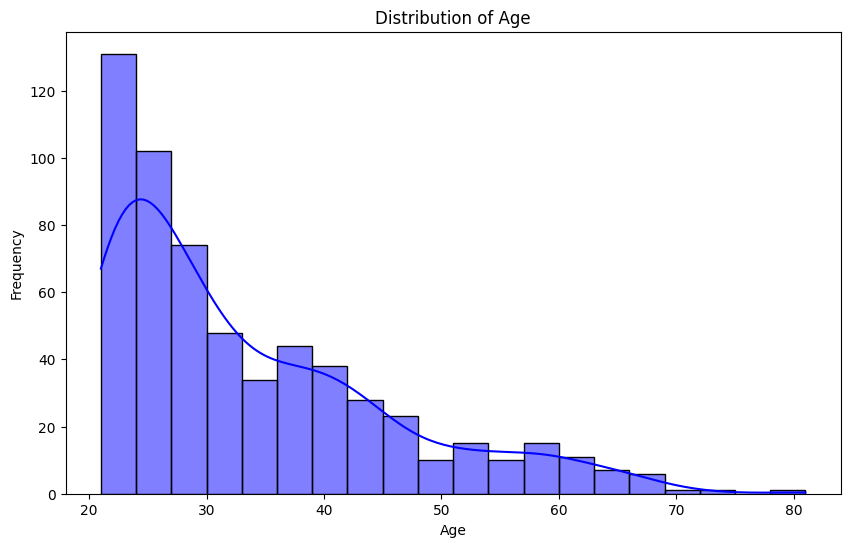

In [31]:
# Visualize distributions of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

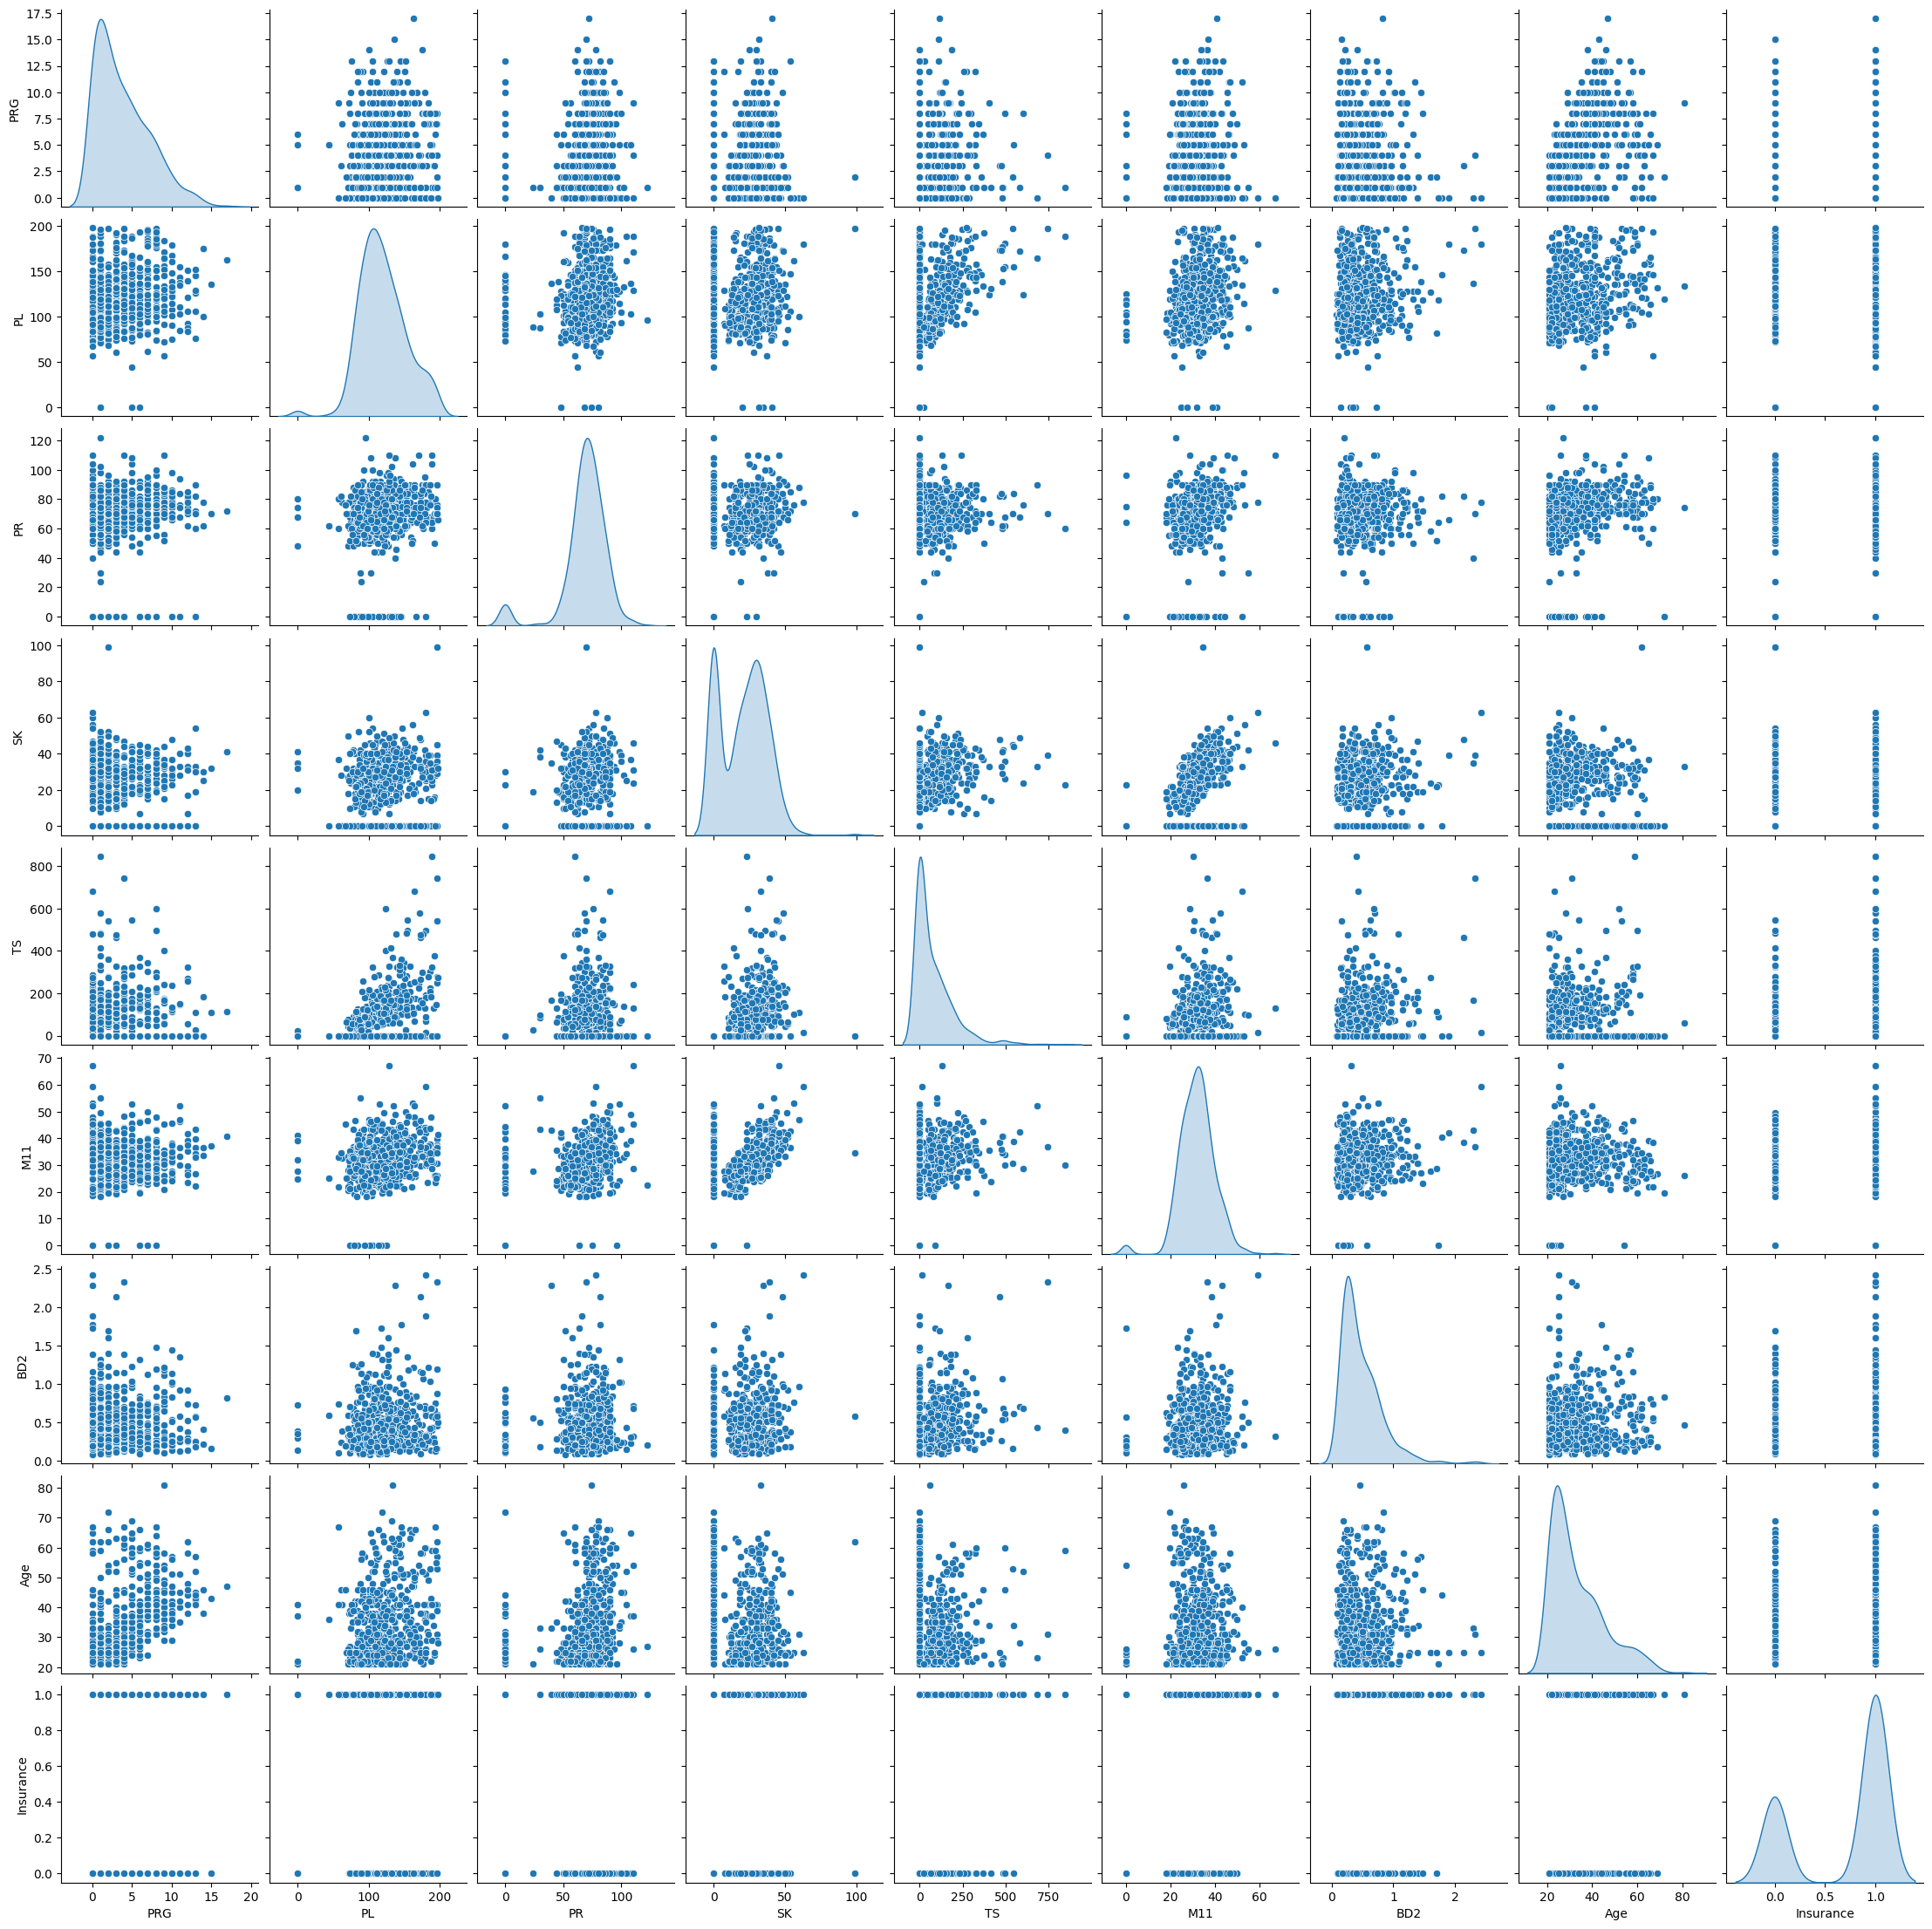

In [18]:
# Visualize relationships between numerical features using pairplot
sns.pairplot(df_train, diag_kind='kde')
plt.show()

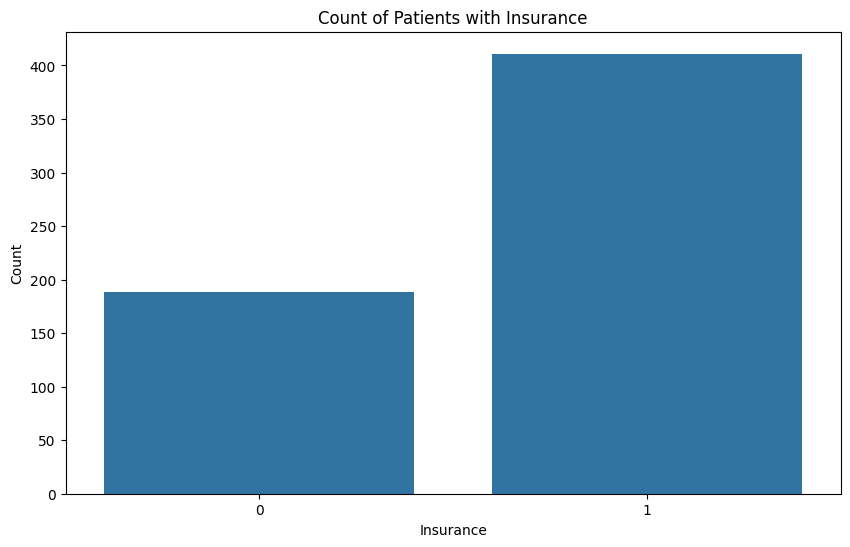

In [37]:
# Visualize categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x ='Insurance', data=df_train)
plt.title('Count of Patients with Insurance')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.show()

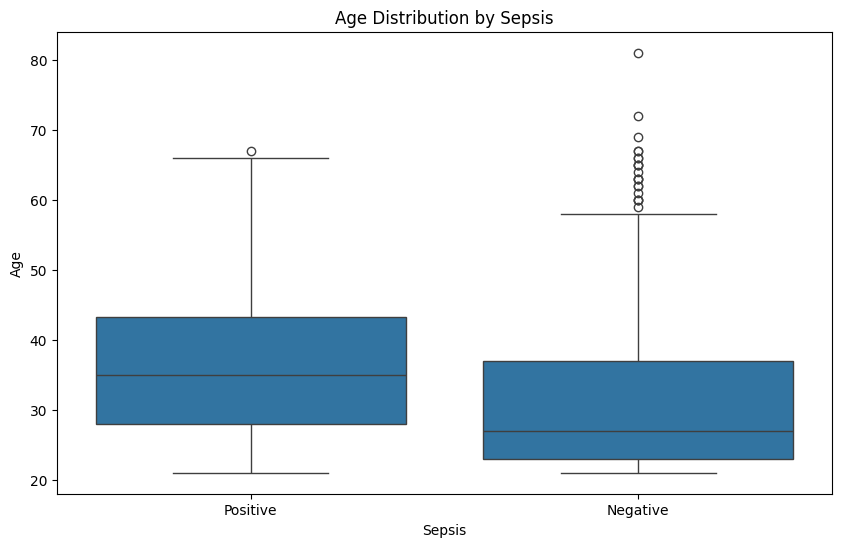

In [36]:
# Explore relationship between categorical target variable (Sepssis) and numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='Age', data=df_train)
plt.title('Age Distribution by Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.show()

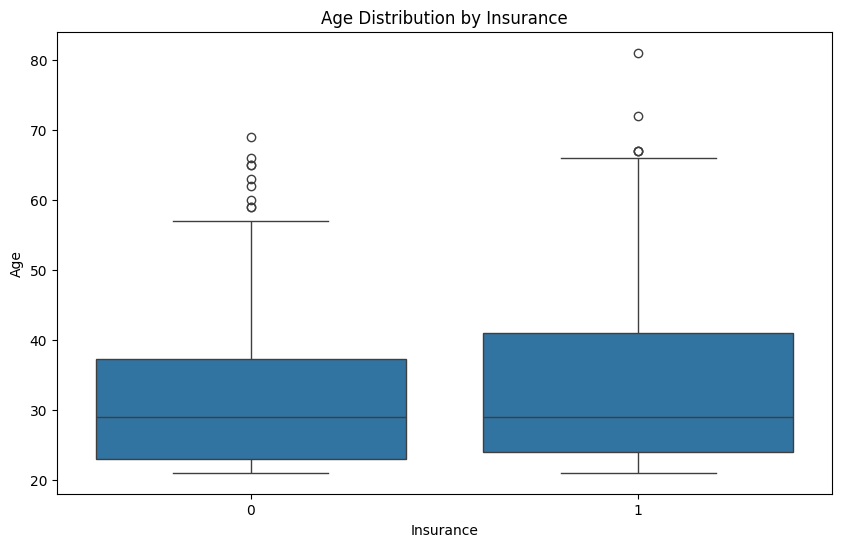

In [38]:
# Explore relationships between categorical and numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insurance', y='Age', data=df_train)
plt.title('Age Distribution by Insurance')
plt.xlabel('Insurance')
plt.ylabel('Age')
plt.show()

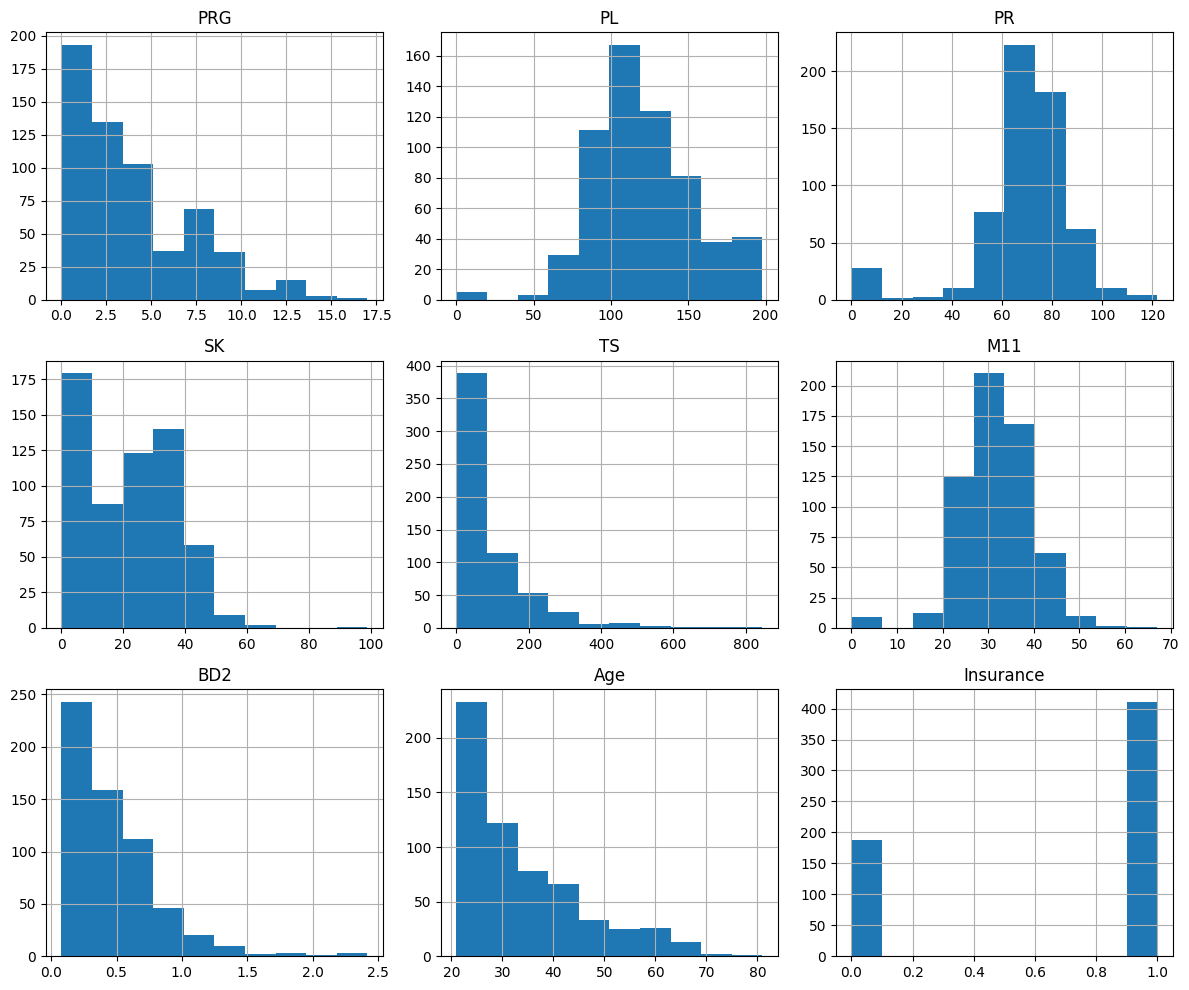

In [39]:
# Display histograms for all numerical features
df_train.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

## MultiVariate Analysis (PCA)

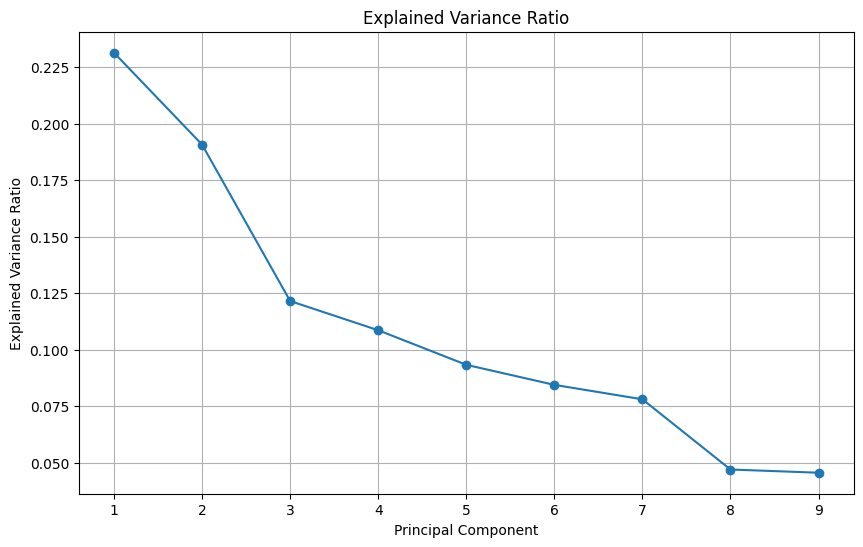

In [41]:
# Separate features and target variable
X = df_train.drop(columns=['ID', 'Sepssis'])  # Exclude non-numeric and target columns
y = df_test.drop(columns =['ID'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()